# Load Modules

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare/collect data

In [21]:
import os

path = os.listdir('brain_tumor/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1 }

In [22]:
import cv2
X = []
Y = []
for cls in classes:
    pth = 'brain_tumor/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [23]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [24]:
np.unique(Y)

array([0, 1])

In [25]:
pd.Series(Y).value_counts()

1    982
0    493
dtype: int64

In [26]:
X.shape, X_updated.shape

((1475, 200, 200), (1475, 40000))

# Visualize data: 

### Sample image Visulaization

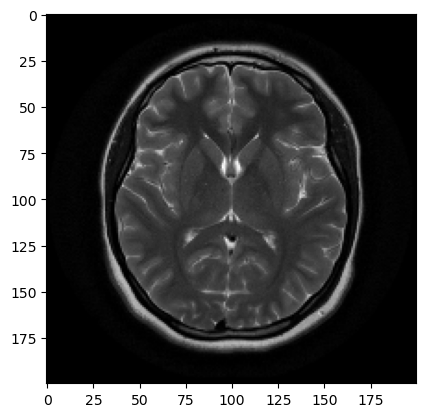

In [27]:
plt.imshow(X[0], cmap='gray')

### Bar-graph of dataset

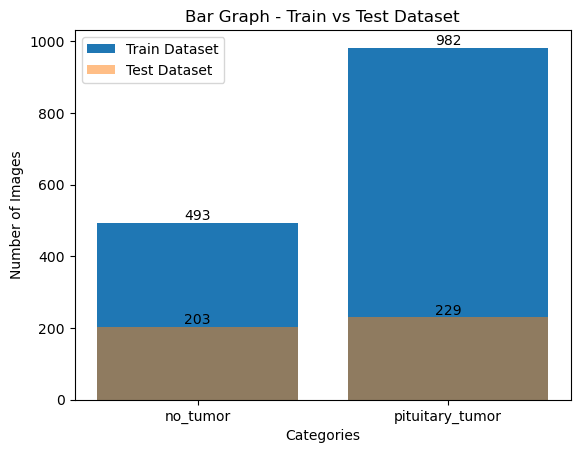

In [28]:
import os
import matplotlib.pyplot as plt

# Dataset paths
train_path = 'brain_tumor/Training/'
test_path = 'brain_tumor/Testing/'

# Count the number of images in each category of the train dataset
train_categories = os.listdir(train_path)
train_images = [len(os.listdir(os.path.join(train_path, category))) for category in train_categories]

# Count the number of images in each category of the test dataset
test_categories = os.listdir(test_path)
test_images = [len(os.listdir(os.path.join(test_path, category))) for category in test_categories]

# Create a bar graph
plt.bar(train_categories, train_images, label='Train Dataset')
plt.bar(test_categories, test_images, label='Test Dataset', alpha=0.5)

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Number of Images')

# Display the number of images on top of each bar
for i, train_image in enumerate(train_images):
    plt.text(i, train_image, str(train_image), ha='center', va='bottom')
    
for i, test_image in enumerate(test_images):
    plt.text(i, test_image, str(test_image), ha='center', va='bottom')

plt.title('Bar Graph - Train vs Test Dataset')

# Add legend
plt.legend()

# Display the graph
plt.show()


# Prepare data

In [29]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1475, 40000)

# Split Data

In [30]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10, test_size=.20)

In [31]:
xtrain.shape, xtest.shape

((1180, 40000), (295, 40000))

# Feature Scaling

In [32]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Train Model

#### 1. Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)


LogisticRegression(C=0.1)

#### 2. SVM 

In [34]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

#### 3.KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(xtrain, ytrain)

KNeighborsClassifier()

#### 4. Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_classifier = RandomForestClassifier()
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier()

#### 5.CNN Model

In [37]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the path to your dataset
train_data_dir = 'brain_tumor/Training'
test_data_dir = 'brain_tumor/Testing'

# Define image dimensions and batch size
img_width, img_height = 150, 150
batch_size = 32

# Data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load and preprocess training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load and preprocess test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Define the CNN model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)


Found 1475 images belonging to 2 classes.
Found 432 images belonging to 2 classes.
Epoch 1/10
46/46 [==============================] - 36s 754ms/step - loss: 0.5872 - accuracy: 0.7249 - val_loss: 0.6728 - val_accuracy: 0.6298
Epoch 2/10
46/46 [==============================] - 32s 686ms/step - loss: 0.4602 - accuracy: 0.7990 - val_loss: 0.6062 - val_accuracy: 0.6562
Epoch 3/10
46/46 [==============================] - 32s 691ms/step - loss: 0.3347 - accuracy: 0.8489 - val_loss: 0.5504 - val_accuracy: 0.7115
Epoch 4/10
46/46 [==============================] - 33s 706ms/step - loss: 0.2850 - accuracy: 0.8732 - val_loss: 0.6080 - val_accuracy: 0.6274
Epoch 5/10
46/46 [==============================] - 36s 787ms/step - loss: 0.2790 - accuracy: 0.8718 - val_loss: 0.5571 - val_accuracy: 0.6899
Epoch 6/10
46/46 [==============================] - 32s 698ms/step - loss: 0.2464 - accuracy: 0.8836 - val_loss: 0.4075 - val_accuracy: 0.8486
Epoch 7/10
46/46 [==============================] - 33s 714

In [38]:
from tensorflow.keras.preprocessing import image

img_path = 'brain_tumor/Testing/no_tumor/image(10).jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("It's a tumor!")
else:
    print("It's  no tumor")

1/1 [==============================] - 0s 339ms/step
It's  no tumor


# Evaluation

In [39]:
print("Logistic regression Training Score: {:.2f}%".format(lg.score(xtrain, ytrain)*100))
print("Logistic regression Testing Score: {:.2f}%".format( lg.score(xtest, ytest)*100))

Logistic regression Training Score: 100.00%
Logistic regression Testing Score: 86.78%


In [40]:
print("SVM Training Score: {:.2f}%".format(sv.score(xtrain, ytrain)*100))
print("SVM Testing Score: {:.2f}%".format(sv.score(xtest, ytest)*100))

SVM Training Score: 97.29%
SVM Testing Score: 88.81%


In [41]:
# Calculate training accuracy for KNN
knn_train_predictions = knn_classifier.predict(xtrain)
knn_train_accuracy = accuracy_score(ytrain, knn_train_predictions)

# Calculate testing accuracy for KNN
knn_test_predictions = knn_classifier.predict(xtest)
knn_test_accuracy = accuracy_score(ytest, knn_test_predictions)

print("KNN Training Accuracy: {:.2f}%".format( knn_train_accuracy*100))
print("KNN Testing Accuracy: {:.2f}%".format( knn_test_accuracy*100))

KNN Training Accuracy: 91.02%
KNN Testing Accuracy: 85.76%


In [42]:
# Calculate training accuracy for Random Forest
rf_train_predictions = rf_classifier.predict(xtrain)
rf_train_accuracy = accuracy_score(ytrain, rf_train_predictions)

# Calculate testing accuracy for Random Forest
rf_test_predictions = rf_classifier.predict(xtest)
rf_test_accuracy = accuracy_score(ytest, rf_test_predictions)

print("Random Forest Training Accuracy: {:.2f}%".format(rf_train_accuracy*100))
print("Random Forest Testing Accuracy: {:.2f}%".format( rf_test_accuracy*100))

Random Forest Training Accuracy: 100.00%
Random Forest Testing Accuracy: 91.19%


In [45]:
final_train_accuracy = history.history['accuracy'][-1] 
validset_accuracy = history.history['val_accuracy'][-1]

print("CNN Training Accuracy: {:.2f}%".format(final_train_accuracy * 100))

validset_accuracy = history.history['val_accuracy'][-1]
print("CNN Validation Set Accuracy: {:.2f}%".format(validset_accuracy * 100))


CNN Training Accuracy: 91.48%
CNN Validation Set Accuracy: 71.15%


# Prediction

In [46]:
pred = sv.predict(xtest)
pred

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1])

# Test model

In [47]:
dec = {0:'No Tumor', 1:'Pituitary Tumor'}

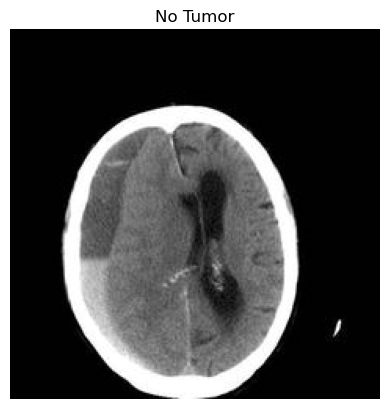

In [48]:
img = cv2.imread("brain_tumor/Testing/no_tumor/image(1).jpg", 0)
img1 = cv2.resize(img, dsize=(200, 200))
img1 = img1.reshape(1, -1) / 255
p = sv.predict(img1)

plt.title(dec[p[0]])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.show()

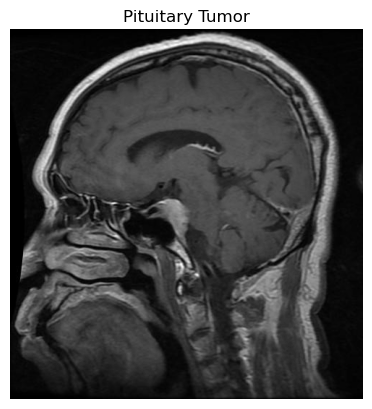

In [49]:
# detecting for one image of positive tumor

img = cv2.imread("brain_tumor/Testing/pituitary_tumor/image(1).jpg", 0)
img1 = cv2.resize(img, dsize=(200, 200))
img1 = img1.reshape(1, -1) / 255
p = sv.predict(img1)

plt.title(dec[p[0]])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.show()

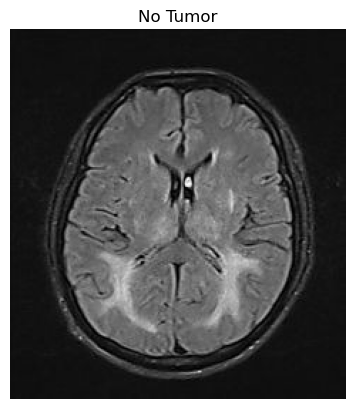

In [50]:
img = cv2.imread("brain_tumor/Testing/no_tumor/image(10).jpg", 0)
img1 = cv2.resize(img, dsize=(200, 200))
img1 = img1.reshape(1, -1) / 255
p = sv.predict(img1)

plt.title(dec[p[0]])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.show()

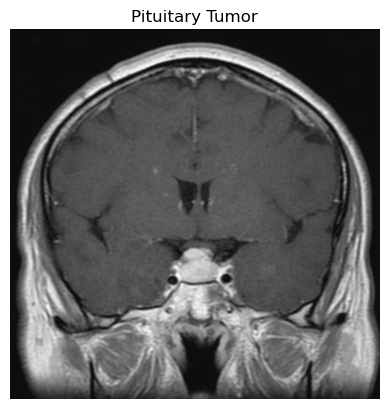

In [51]:
img = cv2.imread("brain_tumor/Testing/pituitary_tumor/image(10).jpg", 0)
img1 = cv2.resize(img, dsize=(200, 200))
img1 = img1.reshape(1, -1) / 255
p = sv.predict(img1)

plt.title(dec[p[0]])
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.xticks([])
plt.yticks([])
plt.show()

# Visualization: 

### 1. ROC-AUC Curve: 

#### a) CNN 

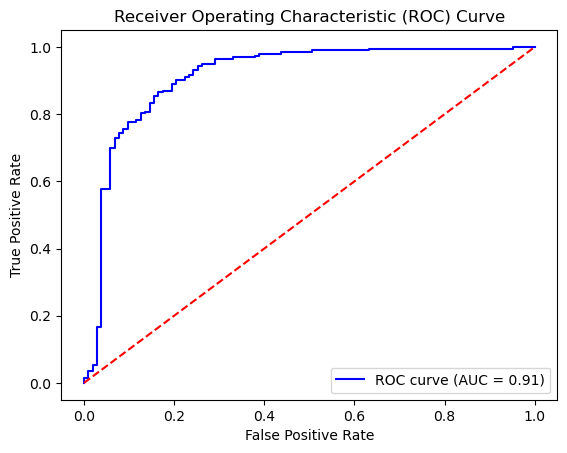

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit the logistic regression model
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

# Generate predicted probabilities on the test set
y_pred_prob = lg.predict_proba(xtest)[:, 1]  # Probability of positive class

# Compute false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### b) SVM 

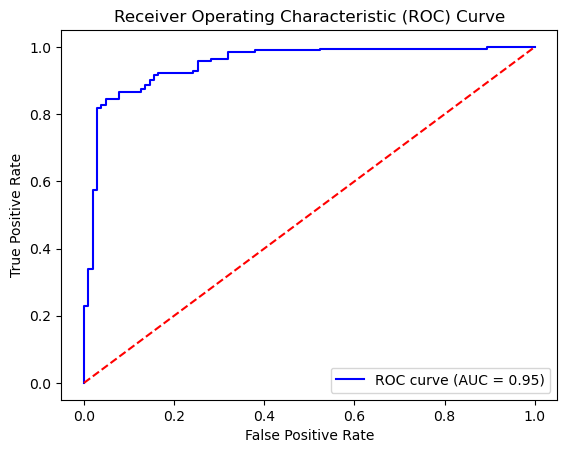

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit the SVC model
sv = SVC()
sv.fit(xtrain, ytrain)

# Generate predicted probabilities on the test set
y_pred_prob = sv.decision_function(xtest)


fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### c) KNN 

Text(0, 0.5, 'True Positive Rate')

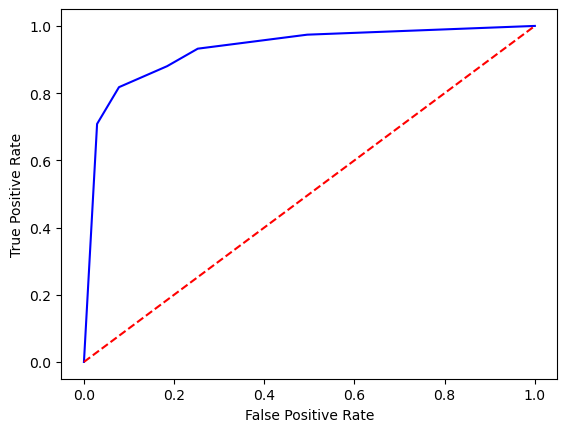

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit the KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(xtrain, ytrain)

# Generate predicted probabilities on the test set
y_pred_prob = knn_classifier.predict_proba(xtest)[:, 1]  # Probability of positive class

# Compute false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


#### d) Random Forest

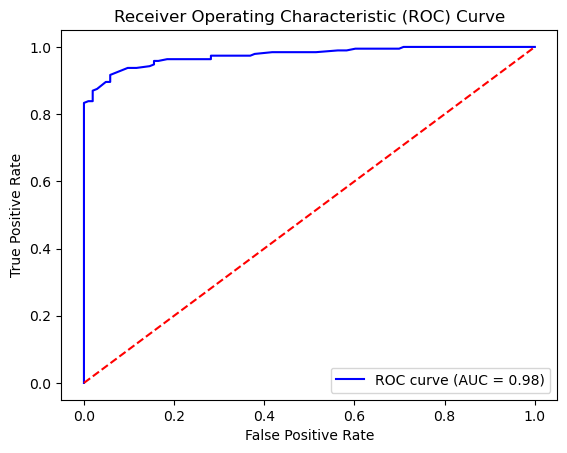

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(xtrain, ytrain)

# Generate predicted probabilities on the test set
y_pred_prob = rf_classifier.predict_proba(xtest)[:, 1]  # Probability of positive class

# Compute false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


#### e)  Logistic regression 

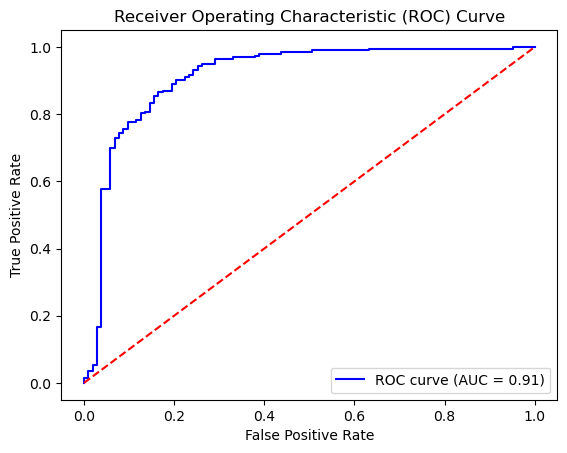

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Fit the Logistic Regression model
lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

# Generate predicted probabilities on the test set
y_pred_prob = lg.predict_proba(xtest)[:, 1]  # Probability of positive class

# Compute false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='b', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### 2. Confusion matrix

#### a) CNN model

14/14 [==============================] - 2s 146ms/step


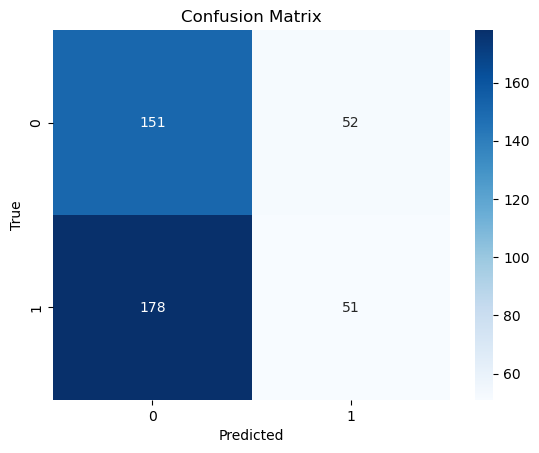

In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred_prob = model.predict(test_generator)
y_pred = np.round(y_pred_prob).astype(int)

# Define a new threshold (adjust this value as needed)
new_threshold = 0.5

# Apply the new threshold to the predicted probabilities
y_pred_adjusted = (y_pred_prob >= new_threshold).astype(int)

# Get the true labels
y_true = test_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_adjusted)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### b) Logistic Regression model

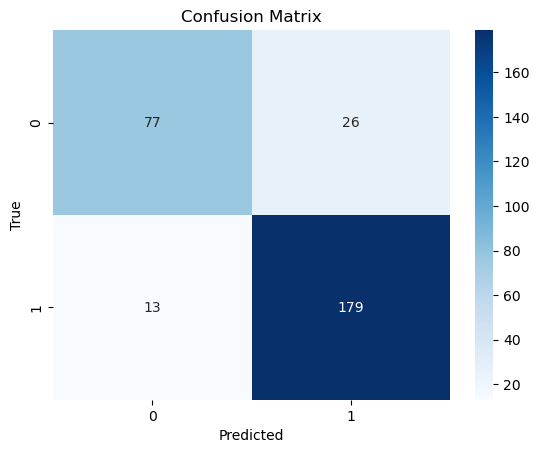

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = lg.predict(xtest)

# Get the true labels
y_true = ytest

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### c) SVM model

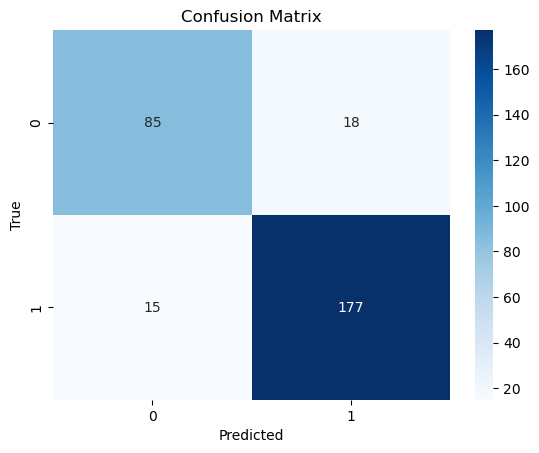

In [59]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Fit the SVC model
sv = SVC()
sv.fit(xtrain, ytrain)

# Generate predicted probabilities on the test set
y_pred_prob = sv.decision_function(xtest)

# Compute false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Make predictions on the test set
y_pred = sv.predict(xtest)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



#### d) KNN model 

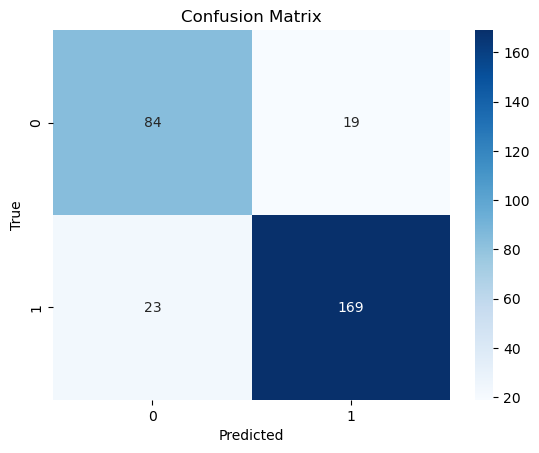

In [60]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Fit the KNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(xtrain, ytrain)

# Generate predicted probabilities on the test set
y_pred_prob = knn_classifier.predict_proba(xtest)[:, 1]  # Probability of positive class

# Compute false positive rate, true positive rate, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Make predictions on the test set
y_pred = knn_classifier.predict(xtest)

# Compute the confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#### e) Random forest model

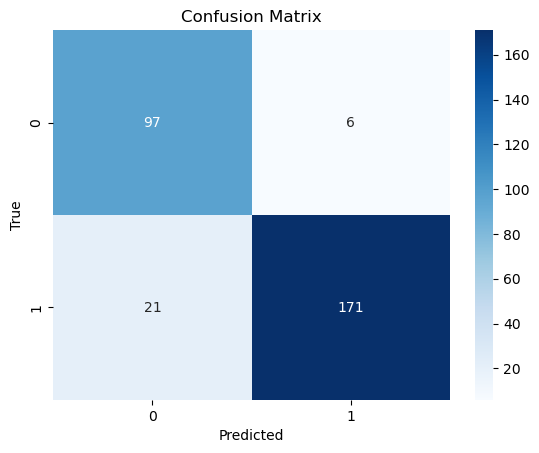

In [61]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Fit the Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(xtrain, ytrain)

# Make predictions on the test set
y_pred = rf_classifier.predict(xtest)

# Get the true labels
y_true = ytest

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['0', '1'], yticklabels=['0', '1'])

# Add labels, title, and axis ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
